In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
image_path = r"C:\Tower_of_Pisa.jpg"  
img = mpimg.imread(image_path)  
img = img.astype('float32') / 255.0  


In [26]:
def transform_image(image):
    if image is None:
        raise ValueError("Input image is None")
    
    transformations = []  # Liste der Transformationen
    
    # Random flip left/right
    if tf.random.uniform([]) > 0.5:
        image = tf.image.flip_left_right(image)
        transformations.append("Flip LR")
    
    # Random brightness / contrast / saturation / hue
    if tf.random.uniform([]) > 0.5:
        image = tf.image.random_brightness(image, max_delta=0.2)
        transformations.append("Brightness")
        
    if tf.random.uniform([]) > 0.5:
        image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
        transformations.append("Contrast")
        
    if tf.random.uniform([]) > 0.5:
        image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
        transformations.append("Saturation")
        
    if tf.random.uniform([]) > 0.5:
        image = tf.image.random_hue(image, max_delta=0.1)
        transformations.append("Hue")
    
    # Crop
    shape = tf.shape(image)
    h = tf.cast(shape[0], tf.int32)
    w = tf.cast(shape[1], tf.int32)
    min_h = tf.maximum(2, tf.cast(tf.cast(h, tf.float32) * 0.5, tf.int32))
    min_w = tf.maximum(2, tf.cast(tf.cast(w, tf.float32) * 0.5, tf.int32))
    crop_h = tf.maximum(min_h, tf.cast(tf.cast(h, tf.float32) * 0.9, tf.int32))
    crop_w = tf.maximum(min_w, tf.cast(tf.cast(w, tf.float32) * 0.9, tf.int32))
    try:
        image = tf.image.random_crop(image, size=[crop_h, crop_w, 3])
        transformations.append("Crop")
    except tf.errors.InvalidArgumentError as e:
        tf.print("random_crop failed, skipping crop:", e)

    image = tf.image.resize(image, [h, w])
    image = tf.clip_by_value(image, 0.0, 1.0)
    
    return image, transformations

In [22]:
transform_colors = {
    "Flip LR": "cyan",
    "Brightness": "yellow",
    "Contrast": "magenta",
    "Saturation": "lime",
    "Hue": "orange",
    "Crop": "red"
}


In [27]:
def draw_transformations(ax, transformations):
    n = len(transformations)
    if n == 0:
        return
    # y-Positionen gleichmäßig über Bildhöhe verteilen (10% bis 90%)
    for i, t in enumerate(transformations):
        y_pos = 0.1 + i*(0.8/(n-1)) if n > 1 else 0.5
        ax.text(0.02, y_pos, t, color=transform_colors.get(t, "white"),
                fontsize=12, fontweight='bold', transform=ax.transAxes,
                backgroundcolor='black')

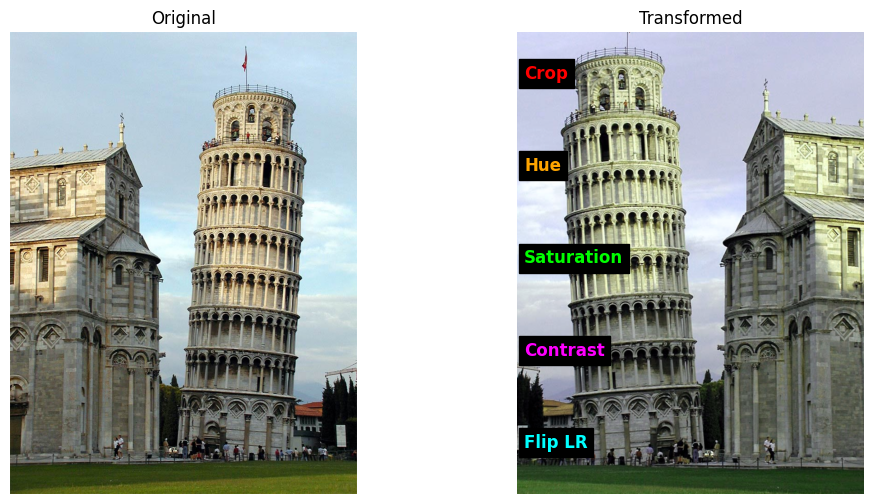

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Original
axes[0].imshow(img)
axes[0].set_title("Original")
axes[0].axis("off")

# Transformed
transformed_img, transforms = transform_image(img)
axes[1].imshow(transformed_img)
axes[1].set_title("Transformed")
axes[1].axis("off")
draw_transformations(axes[1], transforms)

plt.show()

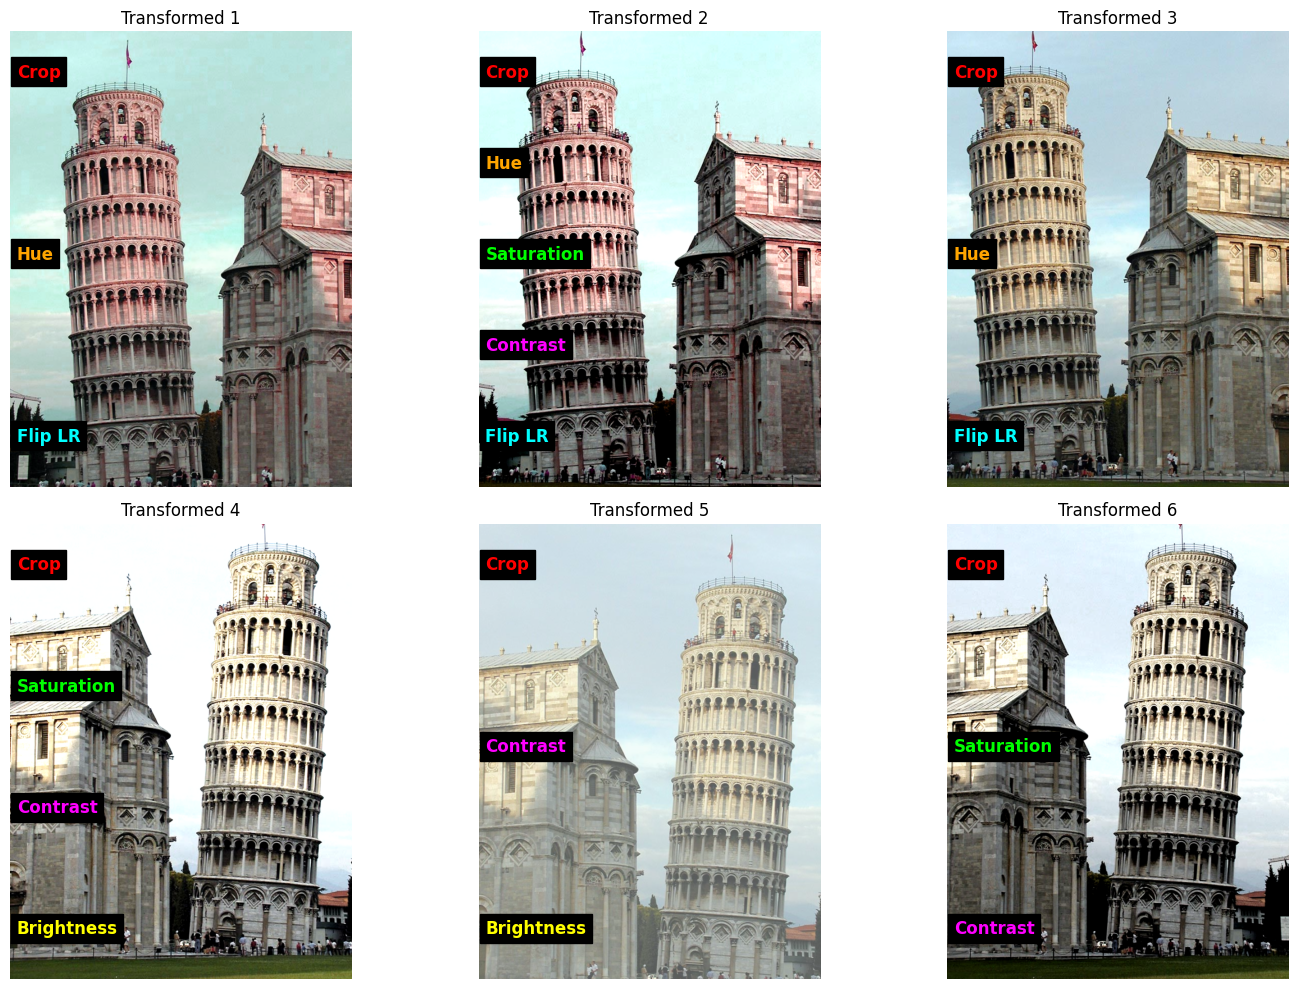

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.flatten()
n = 6
for i in range(n):
    t_img, transforms = transform_image(img)
    axes[i].imshow(t_img)
    axes[i].set_title(f"Transformed {i+1}")
    axes[i].axis("off")
    draw_transformations(axes[i], transforms)

plt.tight_layout()
plt.show()